In [19]:
import pandas as pd

dframe  = pd.read_csv('Electric_Vehicle_Population_Data.csv')
dframe.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [2]:
dframe.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [3]:
dframe['Model Year'].isnull().sum()

0

In [4]:
ser_index  =dframe['Model Year']
ser_index

0         2020
1         2023
2         2019
3         2016
4         2021
          ... 
177861    2022
177862    2023
177863    2021
177864    2021
177865    2021
Name: Model Year, Length: 177866, dtype: int64

In [5]:
dframe[['Model Year','VIN (1-10)']]

,Model Year,VIN (1-10)
0,2020,5YJYGDEE1L
1,2023,7SAYGDEE9P
2,2019,5YJSA1E4XK
3,2016,5YJSA1E27G
4,2021,5YJYGDEE5M
...,...,...
177861,2022,7SAYGDEE3N
177862,2023,KM8K23AG1P
177863,2021,5YJYGDEE6M
177864,2021,WVGKMPE27M


In [6]:
df1 = dframe

In [7]:
rindex  =  dframe['Model Year'].values

In [8]:
rindex
dframe.set_index(rindex , inplace=True)

In [9]:
dframe.groupby('Legislative District')['Legislative District'].count()

Legislative District
1.0      7786
2.0      2015
3.0       876
4.0      1470
5.0      7614
6.0      1691
7.0       839
8.0      1831
9.0      1003
10.0     3018
11.0     7507
12.0     1644
13.0     1211
14.0     1123
15.0      443
16.0      885
17.0     3000
18.0     4744
19.0     1032
20.0     1582
21.0     4410
22.0     4399
23.0     3830
24.0     2391
25.0     1838
26.0     3538
27.0     2522
28.0     2277
29.0     1183
30.0     2120
31.0     3100
32.0     4358
33.0     3550
34.0     5155
35.0     2488
36.0     7389
37.0     5215
38.0     1736
39.0     2593
40.0     3798
41.0    11553
42.0     2444
43.0     6524
44.0     4677
45.0    10737
46.0     6901
47.0     3230
48.0     9817
49.0     2390
Name: Legislative District, dtype: int64

In [10]:
df1['VIN (1-10)'].value_counts()

7SAYGDEE6P    1239
7SAYGDEE7P    1235
7SAYGDEE8P    1197
7SAYGDEEXP    1191
7SAYGDEE5P    1177
              ... 
3C3CFFGE1K       1
LVYH60AF3R       1
WA132BFZXR       1
YV4H60DM5P       1
WMEFK9BA7J       1
Name: VIN (1-10), Length: 10830, dtype: int64

In [11]:
dframe['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [12]:
dframe.groupby('DOL Vehicle ID')['DOL Vehicle ID'].count()

DOL Vehicle ID
4385         1
4777         1
10286        1
10734        1
12050        1
            ..
478926346    1
478934571    1
478935460    1
479114996    1
479254772    1
Name: DOL Vehicle ID, Length: 177866, dtype: int64

In [13]:
dframe['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [14]:
evd = df1[(df1['Electric Range'] !=0) & (df1['Base MSRP'] != 0)]

In [15]:
engy_util = dframe['Electric Utility'].value_counts().nlargest(10)
engy_util

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                      65990
PUGET SOUND ENERGY INC                                                             35882
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                       31381
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                   10173
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY     7828
PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY                                  4008
BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY          2797
BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY                          1537
PACIFICORP                                                                          1306
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY                          1244
Name: Electric Utility, dtype: int64

# Largest Energy Utility

<Figure size 3000x3000 with 0 Axes>

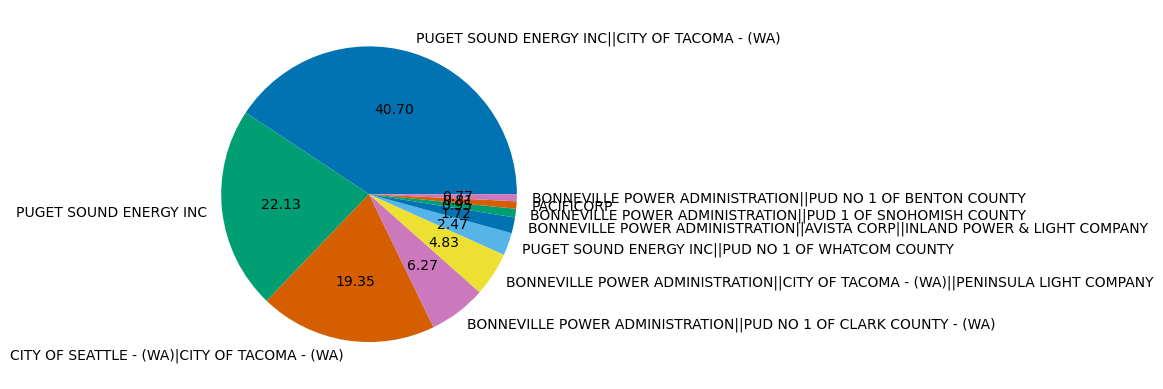

<Figure size 3000x3000 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
col = sns.color_palette('colorblind6')
plt.pie(engy_util , labels= engy_util.index, autopct="%.2f" ,colors=col)
plt.figure(figsize= (30,30))

# using donut plot in Pyplot (interactive)

In [17]:
engy_util.values

array([65990, 35882, 31381, 10173,  7828,  4008,  2797,  1537,  1306,
        1244], dtype=int64)

In [18]:
import plotly.express as px

fig = px.pie(values=engy_util ,
             names= engy_util.index ,
              color=engy_util.index , hole = .5)

fig.show()